In [256]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

In [257]:
df = pd.read_csv("D:/New folder/Assignment/data.csv",encoding='unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [259]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [260]:
# Summary statistics for categorical variables
df.describe(include='object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


In [261]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# Data Exploration and Cleaning: 

1:Provide a summary of the dataset (e.g., total number of transactions, total sales, average transaction value).\


In [262]:
total_trns=df['InvoiceNo'].nunique()
print("Total no of Transactions :",total_trns)

Total no of Transactions : 25900


In [263]:
# average Transaction value 
df['order_amt']=df['Quantity']*df['UnitPrice']
# group by on the invoiceNo 
df1=df.groupby('InvoiceNo')['order_amt'].agg(sum)
df2=df.groupby('InvoiceNo')['Quantity'].agg(sum)



C:\Users\seemantk\AppData\Local\Temp\ipykernel_11672\2269814738.py:4: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df1=df.groupby('InvoiceNo')['order_amt'].agg(sum)
C:\Users\seemantk\AppData\Local\Temp\ipykernel_11672\2269814738.py:5: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df2=df.groupby('InvoiceNo')['Quantity'].agg(sum)


In [264]:
Total_sales_qnty=df2.sum()
print("Total sales quantity wise :",Total_sales_qnty)

Total_sales_Amt=df1.sum()
print("Total sales amount wise :",Total_sales_Amt)


Total sales quantity wise : 5176450
Total sales amount wise : 9747747.934


In [265]:
top_10_stock=df['StockCode'].value_counts(normalize=True).head(10)*100
print("Popular stock :",top_10_stock)

Popular stock : StockCode
85123A    0.426824
22423     0.406526
85099B    0.398406
47566     0.318688
20725     0.302449
84879     0.277168
22720     0.272555
22197     0.272370
21212     0.255578
20727     0.249119
Name: proportion, dtype: float64


In [337]:
df['InvoiceDate']=pd.to_datetime(df["InvoiceDate"])

df['year']=df["InvoiceDate"].dt.year
df['month']=df["InvoiceDate"].dt.month
df['Day']=df["InvoiceDate"].dt.dayofweek
df['Time']=df["InvoiceDate"].dt.time

In [267]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_amt,year,month,Day,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,2010,12,1,08:26:00



### 2: Identify and handle any missing or inconsistent data. 

In [268]:

missing_data = df.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / df.shape[0]) * 100
missing_percentage.sort_values(ascending=True, inplace=True)

In [269]:
missing_percentage

Description     0.268311
CustomerID     24.926694
dtype: float64

([0, 1], [Text(0, 0, 'Description'), Text(0, 1, 'CustomerID')])

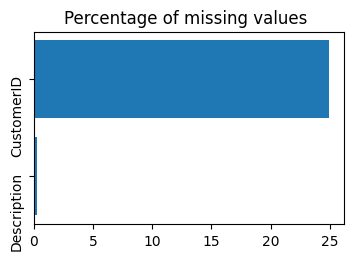

In [270]:
plt.figure(figsize=(4, 2.5))
plt.barh(missing_percentage.index ,missing_percentage)
plt.title("Percentage of missing values ",)
plt.yticks(rotation=90)
# plt.ylabel("Missing Attribute")

In [271]:
# Removing rows with missing values in 'CustomerID' and 'Description' columns
df=df.dropna(subset=['CustomerID', 'Description'])

In [272]:

# Group by StockCode and count unique descriptions
description_counts = df.groupby('StockCode')['Description'].nunique().reset_index()
description_counts.columns = ['StockCode', 'unique_descriptions']
# print(description_counts)

multiple_descriptions = description_counts[description_counts['unique_descriptions'] > 1]
multiple_descriptions


,StockCode,unique_descriptions
42,16156L,2
100,17107D,3
118,20622,2
170,20725,2
262,20914,2
...,...,...
3310,85184C,2
3311,85185B,2
3374,90014A,2
3375,90014B,2


In [273]:
# to check if there is any negative Quantity 
df[df['Quantity']<0].shape[0]


8905

#### As we  see there are some quantity with the negative values so , form this we get that there are returns orders also. 

In [274]:

df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

In [275]:
df[df["Transaction_Status"]=='Cancelled'].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_amt,year,month,Day,Time,Transaction_Status
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50,2010,12,1,09:41:00,Cancelled
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65,2010,12,1,09:49:00,Cancelled
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,2010,12,1,10:24:00,Cancelled
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,2010,12,1,10:24:00,Cancelled
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,2010,12,1,10:24:00,Cancelled


In [276]:
# Duplicates records 
df[df.duplicated()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_amt,year,month,Day,Time,Transaction_Status
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom,1.25,2010,12,1,11:45:00,Completed
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom,2.10,2010,12,1,11:45:00,Completed
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom,2.95,2010,12,1,11:45:00,Completed
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom,4.95,2010,12,1,11:45:00,Completed
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom,2.95,2010,12,1,11:49:00,Completed


Descriptive Analysis: 

Calculate the total revenue generated from sales. 

Identify the top 10 best-selling products by revenue. 

Determine the total number of unique customers. 

In [277]:
# The total revenue generated from sales. 

print("Total Revenue =",df["order_amt"].sum())


Total Revenue = 8300065.814000001


In [291]:

print("TOP 10 Sellling product ")
df.groupby("StockCode")["order_amt"].agg(sum).sort_values(ascending=False).head(10)


TOP 10 Sellling product 


C:\Users\seemantk\AppData\Local\Temp\ipykernel_11672\3718835390.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.groupby("StockCode")["order_amt"].agg(sum).sort_values(ascending=False).head(10)


StockCode
22423     132870.40
85123A     93979.20
85099B     83236.76
47566      67687.53
POST       66710.24
84879      56499.22
23084      51137.80
22502      46980.95
79321      45936.81
22086      41500.48
Name: order_amt, dtype: float64

In [290]:
# unique customer
print("Total no of unique customer:",df['CustomerID'].unique().shape[0])

Total no of unique customer: 4372


In [318]:
unique_stock_grouped = df.groupby('StockCode').first().reset_index()
unique_stock_grouped[["StockCode","Description"]]


,StockCode,Description
0,10002,INFLATABLE POLITICAL GLOBE
1,10080,GROOVY CACTUS INFLATABLE
2,10120,DOGGY RUBBER
3,10123C,HEARTS WRAPPING TAPE
4,10124A,SPOTS ON RED BOOKCOVER TAPE
...,...,...
3679,D,Discount
3680,DOT,DOTCOM POSTAGE
3681,M,Manual
3682,PADS,PADS TO MATCH ALL CUSHIONS


Sales Trends: 

Analyze sales trends over time (e.g., monthly or weekly sales trends). 

Identify any seasonal patterns in sales. 

C:\Users\seemantk\AppData\Local\Temp\ipykernel_11672\4023072868.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('InvoiceDate').resample('M')['order_amt'].sum()


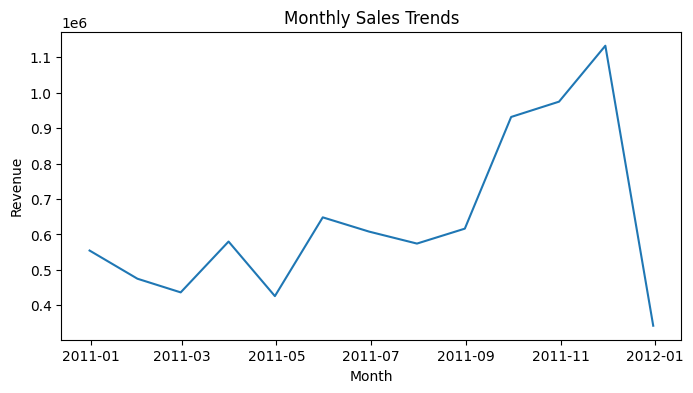

In [321]:
# Monthly sales trends
monthly_sales = df.set_index('InvoiceDate').resample('M')['order_amt'].sum()
plt.figure(figsize=(8, 4))
sns.lineplot(data=monthly_sales)
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()
 
# Seasonal patterns
# Here we can decompose the time series to see seasonal patterns (optional)

### Seasonal patterns in sales.	 

In [355]:
favorite_shopping_day = df.groupby(['Day']).size().reset_index(name='Count')
favorite_shopping_day
# favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Day']]

,Day,Count
0,0,66382
1,1,68110
2,2,70599
3,3,82374
4,4,56127
5,6,63237


In [363]:
favorite_shopping_day['Count'].sort_values(ascending=False)
# top 3 Shopping day of week 
print("Favorite shopping days:\n",favorite_shopping_day['Count'].sort_values(ascending=False).index[0:3])


# 1- Tuesday 
# 2- Wednesday
# 3- thrusday 

Favorite shopping days:
 Index([3, 2, 1], dtype='int64')
